Nama : Desyra Ardiani <br>
Kelas : B <br>
NIM : F1D018012 <br>

Dataset : https://www.kaggle.com/ajaypalsinghlo/world-happiness-report-2021

<a id="read-data"></a>
# UTS_Tugas Mandiri Mata Kuliah Machine Learning

Carilah dataset real, bebas dari internet dengan ketentuan sbb:

Jumlah total atribut lebih dari 5 <br>
Minimal jumlah data adalah 100 data <br>
Dapat digunakan untuk pemodelan Regresi <br>

Kemudian, lakukan beberapa hal berikut:

1. Tentukan variable dependent dan independent dari dataset
2. Lakukan eksplorasi dan visualisasi data
3. Lakukan data analisis dan juga pengecekan serta pembersihan data dari outlier dan missing data jika diperlukan
4. Lakukan pemodelan regresi (linear dan berganda) dan seleksi fitur dengan korelasi agar mendapatkan atribut (variable independent) yang baik untuk digunakan pada model regresi
5. Analisa dan jelaskan hasil evaluasi pemodelan regresi
6. Lakukan pemodelan dengan regresi logistik dengan data yang sama dengan cara mentransformasikan variable dependent yang awalnya bernilai continue menjadi categorical (hint: Gunakan Binning Data in Pandas). Contoh: variable dependent harga mobil (bernilai continue) ditransformasikan menjadi harga model Mahal dan Murah (untuk 2 kelas), dan Mahal, Sedang, Murah (untuk 3 kelas)
7. Analisa dan jelaskan hasil evaluasi pemodelan regresi logistik


In [1]:
import pandas as pd
import numpy as np

In [2]:
#Read csv file from local source
csv_path = "world-happiness-report-2021.csv"
hapiness_df = pd.read_csv(csv_path)
hapiness_df
#hapiness_df.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.000,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.700,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.400,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.000,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.400,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,Lesotho,Sub-Saharan Africa,3.512,0.120,3.748,3.276,7.926,0.787,48.700,0.715,-0.131,0.915,2.43,0.451,0.731,0.007,0.405,0.103,0.015,1.800
145,Botswana,Sub-Saharan Africa,3.467,0.074,3.611,3.322,9.782,0.784,59.269,0.824,-0.246,0.801,2.43,1.099,0.724,0.340,0.539,0.027,0.088,0.648
146,Rwanda,Sub-Saharan Africa,3.415,0.068,3.548,3.282,7.676,0.552,61.400,0.897,0.061,0.167,2.43,0.364,0.202,0.407,0.627,0.227,0.493,1.095
147,Zimbabwe,Sub-Saharan Africa,3.145,0.058,3.259,3.030,7.943,0.750,56.201,0.677,-0.047,0.821,2.43,0.457,0.649,0.243,0.359,0.157,0.075,1.205


# 1. Tentukan variable dependent dan independent dari dataset

1. Dependent : Ladder Score
2. Independen : Logged GDP per capita, Social support, Healthy life expectancy, Freedom to make life choices, Generosity, Perceptions of corruption

# 2. Lakukan eksplorasi dan visualisasi data
1. Eksplorasi untuk mempelajari karakteristik dari data tersebut. 

In [3]:
# Disini kita menggunakan pandas untuk meng-load atau memuat dataset kita 
# Untuk meng-load atau memuat dataset dengan format csv, kita cukup kita panggil pandas dengan "pd.read_csv"
# Ketika di muat, file csv ini akan di konversi formatnya menjadi format yang namanya data frame
# Data frame ini akan di tampung ke dalam variabel bernama hapiness_df

# Load Dataset 
hapiness_df = pd.read_csv("world-happiness-report-2021.csv")
hapiness_df.head() # untuk menampilkan 5 baris pertama

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [4]:
# Untuk menampilkan informasi dataset
hapiness_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
Country name                                  149 non-null object
Regional indicator                            149 non-null object
Ladder score                                  149 non-null float64
Standard error of ladder score                149 non-null float64
upperwhisker                                  149 non-null float64
lowerwhisker                                  149 non-null float64
Logged GDP per capita                         149 non-null float64
Social support                                149 non-null float64
Healthy life expectancy                       149 non-null float64
Freedom to make life choices                  149 non-null float64
Generosity                                    149 non-null float64
Perceptions of corruption                     149 non-null float64
Ladder score in Dystopia                      149 non-null float64
Explained by: Log GDP per 

Disini terdapat 149 entries atau 149 baris.
Terdapat 20 kolom 

In [5]:
# Untuk mengetahui dan mencari tau bentuk/dimensi dataset (jumlah baris, kolom)
# Dataset ini terdiri dari 149 baris dan 20 kolom

hapiness_df.shape 

(149, 20)

In [6]:
#Check types for all the columns
hapiness_df.dtypes

# digunakan untuk mengecek masing-masing datanya 
# biasanya di pandas, biasanya yang selain numeric itu diberikan objek tipe datanya

Country name                                   object
Regional indicator                             object
Ladder score                                  float64
Standard error of ladder score                float64
upperwhisker                                  float64
lowerwhisker                                  float64
Logged GDP per capita                         float64
Social support                                float64
Healthy life expectancy                       float64
Freedom to make life choices                  float64
Generosity                                    float64
Perceptions of corruption                     float64
Ladder score in Dystopia                      float64
Explained by: Log GDP per capita              float64
Explained by: Social support                  float64
Explained by: Healthy life expectancy         float64
Explained by: Freedom to make life choices    float64
Explained by: Generosity                      float64
Explained by: Perceptions of

In [7]:
# Melihat jumlah duplikasi data, dan disini hasilnya adalah false yang menandakan tidak ada duplikasi data
hapiness_df.duplicated().value_counts()

False    149
dtype: int64

<h2>Visualisasi Data<h2>

In [8]:
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns

Untuk visualisasi data pada kasus kita kali ini, kita akan memanfaatkan dua modul, modul yang pertama adalah matplotlib dan yang kedua adalah seaborn.

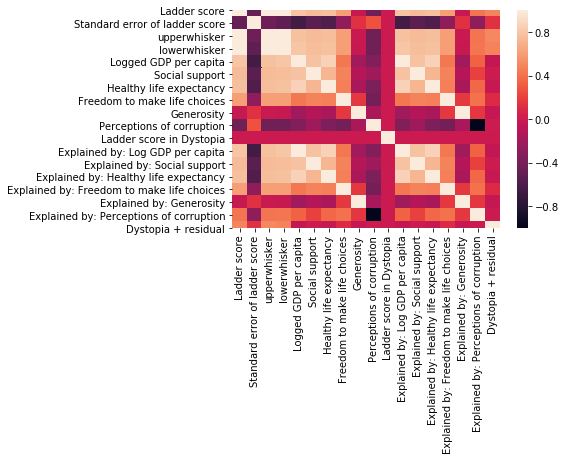

In [9]:
# Heatmap
# Visualisasi pertama yang saya gunakan adalah heatmap, dimana heatmap ini termasuk
# visualisasi yang cocok untuk menvisualisasikan korelasi matriknya.

# Parameternya adalah data
# Data yang kita masukan untuk di visualisasikan adalah dari hasil korelasi matriksnya.

sns.heatmap(data=hapiness_df.corr())

Ini adalah hasil dari visualisasinya, jadi disini di representasikan dengan warna. Semakin gelap warna merepresentasikan nilai korelasi yang makin kecil, sedangkan ketika warnanya makin terang maka nilai korelasinya makin tinggi.

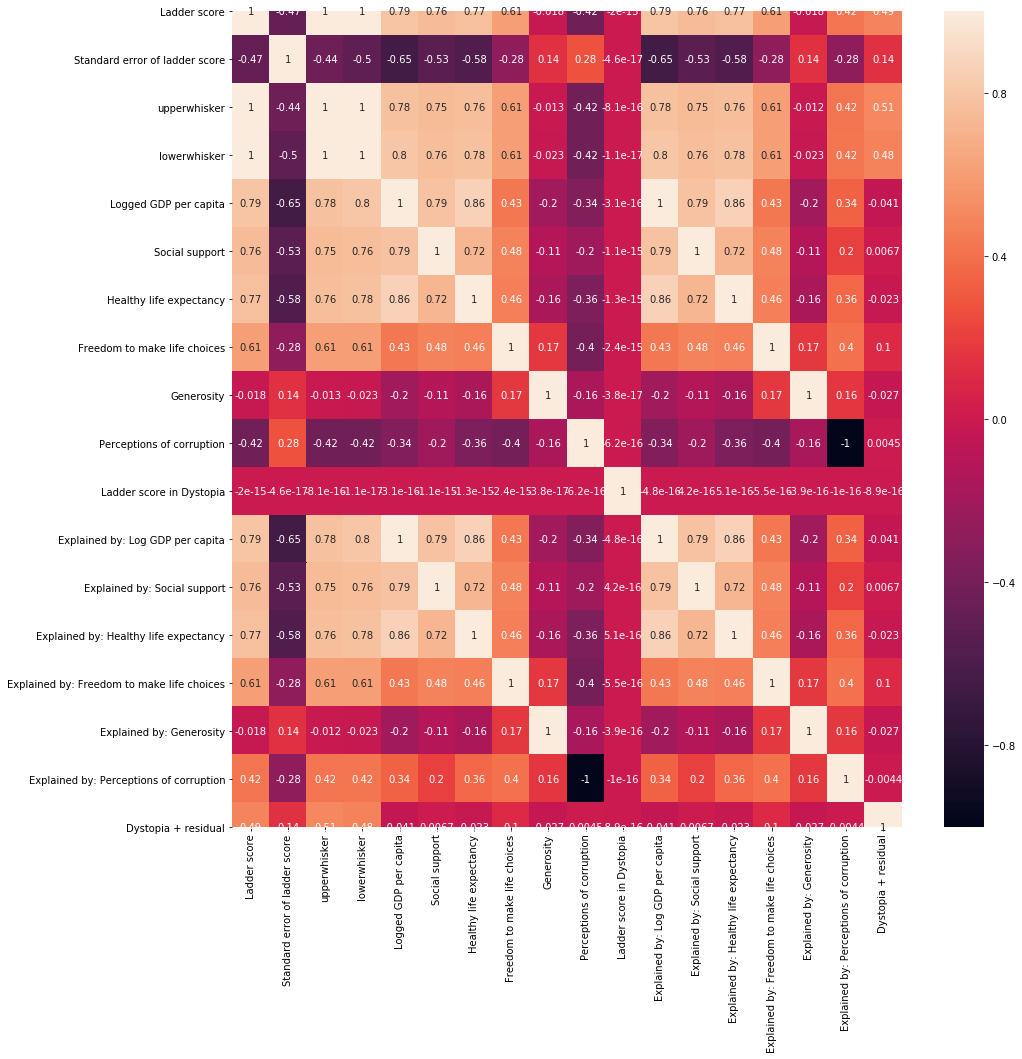

In [10]:
plt.figure(figsize=(15,15))
sns.heatmap(hapiness_df.corr(), annot=True)

In [11]:
# Bar Plot
# Di dalam dataframe kita itu ada regional indicator, dan kita mau cari tahu ada berapa jumlah
# dari setiap regional indicator di dalam dataframe kita.

hapiness_df['Regional indicator'].value_counts()

Sub-Saharan Africa                    36
Western Europe                        21
Latin America and Caribbean           20
Central and Eastern Europe            17
Middle East and North Africa          17
Commonwealth of Independent States    12
Southeast Asia                         9
South Asia                             7
East Asia                              6
North America and ANZ                  4
Name: Regional indicator, dtype: int64

Total regional indicatornya ada 9, yaitu : <br>
1. Western Europe dengan jumlah 36 data
2. dst

Data ini dapat di visualisasikan dengan cara memanfaatkan Bar Plot. <br>
Caranya adalah :

<function matplotlib.pyplot.show(*args, **kw)>

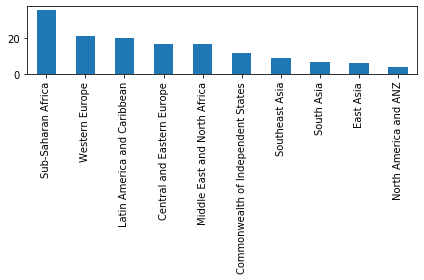

In [12]:
# Kita panggil datasetnya lalu di ikuti dengan .plot.bar
hapiness_df['Regional indicator'].value_counts().plot.bar()
plt.tight_layout()# untuk memastikan visualisasinya optimum/maksimal 
plt.show

Hasil visualisasi dengan matplolib <br>
Sumbu X = Sub-Saharan Africa, Western Eurpe dll <br>
Sumbu Y = 0, 20 => sumbu y nya ber asosiasi dengan jumlah data dari setiap Regional indicatornya.

In [13]:
# Pair Plot
# Visualisasi ini digunakan untuk melihat keseluruhan korelasi antar kolom 

#sns.pairplot(hapiness_df, hue='Regional indicator')
#plt.tight_layout()

Jadi, jika kita memanfaatkan pair plot, sebenarnya kita menvisualisasikan yang namanya korelasi matrik tapi dalam bentuk visualisasi.

# 3. Lakukan data analisis dan juga pengecekan serta pembersihan data dari outlier dan missing data jika diperlukan

In [14]:
# Digunakan untuk mencari tau apakah di dataset kita terdapat missing value atau nilai kosong
# digunakan method sum, isnull nya di sum semua dibagian datanya per kolom 
# Dapat dilihat  tidak ada data yang kosong di dalam dataset yang kita miliki
hapiness_df.isnull().sum()

Country name                                  0
Regional indicator                            0
Ladder score                                  0
Standard error of ladder score                0
upperwhisker                                  0
lowerwhisker                                  0
Logged GDP per capita                         0
Social support                                0
Healthy life expectancy                       0
Freedom to make life choices                  0
Generosity                                    0
Perceptions of corruption                     0
Ladder score in Dystopia                      0
Explained by: Log GDP per capita              0
Explained by: Social support                  0
Explained by: Healthy life expectancy         0
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
Dystopia + residual                           0
dtype: int64

In [15]:
# Digunakan untuk mencari tau apakah di dataset kita terdapat missing value atau nilai kosong
# jika false berarti tidak terdapat nilai kosong
hapiness_df.isna().values.any()

False

# 4. Lakukan pemodelan regresi (linear dan berganda) dan seleksi fitur dengan korelasi agar mendapatkan atribut (variable independent) yang baik untuk digunakan pada model regresi. <br>
# 5. Analisa dan jelaskan hasil evaluasi pemodelan regresi.

<h2>A. Linear Regresi</h2>

​
$$
 X: Predictor \ Variables\\
 Y: Response \ Variable
$$
​

In [16]:
# Menggunakan linear regression dari objek sklearn.linear_model
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [17]:
x = hapiness_df[['Social support']]
y = hapiness_df['Ladder score']

x = np.array(hapiness_df['Social support'])
y = np.array(hapiness_df['Ladder score'])

print(f'x: {x}')
print(f'y: {y}')

x: [0.954 0.954 0.942 0.983 0.942 0.954 0.934 0.908 0.948 0.934 0.94  0.939
 0.903 0.926 0.947 0.891 0.934 0.947 0.92  0.906 0.942 0.862 0.931 0.898
 0.844 0.891 0.932 0.88  0.948 0.813 0.925 0.915 0.821 0.936 0.882 0.831
 0.877 0.935 0.802 0.941 0.896 0.918 0.882 0.898 0.952 0.832 0.843 0.873
 0.762 0.905 0.927 0.847 0.943 0.888 0.864 0.884 0.898 0.879 0.812 0.924
 0.83  0.799 0.832 0.87  0.857 0.821 0.893 0.823 0.81  0.935 0.893 0.858
 0.853 0.82  0.91  0.903 0.836 0.86  0.85  0.827 0.817 0.811 0.636 0.811
 0.644 0.799 0.774 0.931 0.913 0.836 0.71  0.71  0.697 0.805 0.727 0.641
 0.983 0.69  0.489 0.728 0.693 0.639 0.86  0.822 0.651 0.56  0.861 0.671
 0.802 0.888 0.746 0.776 0.672 0.765 0.744 0.74  0.724 0.71  0.781 0.72
 0.688 0.691 0.848 0.818 0.826 0.779 0.767 0.619 0.827 0.77  0.626 0.75
 0.764 0.795 0.686 0.569 0.708 0.63  0.603 0.49  0.832 0.702 0.54  0.537
 0.787 0.784 0.552 0.75  0.463]
y: [7.842 7.62  7.571 7.554 7.464 7.392 7.363 7.324 7.277 7.268 7.183 7.157
 7.155 7.103 7.

Jika kita perhatikan disini, variabel x yang digunakan untuk menampung nilai Social support hanya terdiri dari 1 dimensi saja. Kita ketahui bahwa model machine learning pada sklearn membutuhkan sekumpulan nilai yang ditampung dalam satu array dua dimensi.
Oleh karena itu perlu dilakukan proses reshape terhadap array yang digunakan.

In [18]:
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

x.shape
y.shape

(149, 1)

In [19]:
#Digunakan untuk melakukan training, atau mendapatkan input output dari model 
#yang dihasilkan tergantung metodenya apa.

#Objek model ini akan di training dengan menggunakan method fit, method fit
#ini akan membutuhkan dua buah parameter yaitu sekumpulan nilai 𝑃𝑟𝑒𝑑𝑖𝑐𝑡𝑜𝑟 𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒𝑠
#dan sekumpulan nilai 𝑅𝑒𝑠𝑝𝑜𝑛𝑠𝑒 𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒 yang sudah di tempatkan di variabel x dan y
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Visualisasi Linear Regression

In [20]:
#perlu di reshape agar menghasilkan array 2 dimensi 
#nilainya ini akan di tampung ke dalam variabel x_vis, karena pada dasarnya
#nilai ini akan kita gunakan sebagai nilai x (𝑃𝑟𝑒𝑑𝑖𝑐𝑡𝑜𝑟 𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒𝑠) yang digunakan untuk melakukan visualisasi garis linear
x_vis = np.array(hapiness_df['Social support']).reshape(-1, 1)

#lalu berikutnya berdasarkan nilai x_vis ini, kita akan melakukan prediksi nilai y
#hasil prediksi nya akan di tampung di variabel y_vis
y_vis = model.predict(x_vis)
#y_vis[0:10]

<function matplotlib.pyplot.show(*args, **kw)>

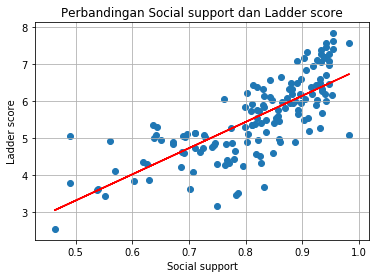

In [21]:
# Berikutnya kita akan melakukan proses visualisasi

#Pertama-tama di panggil dulu plt.scatter lalu kita sertakan nilai x dan y dari dataset
#dan ini digunakan untuk melakukan ploting yang berwarna biru
plt.scatter(x, y)

#Lalu selanjutnya dilakukan plt.plot dan menghasilkan garis lurus warna magenta 
#yang di ploting adalah nilai x_vis dan y_vis 
plt.plot(x_vis, y_vis, '-r', color='red')

plt.title("Perbandingan Social support dan Ladder score")
plt.xlabel('Social support')
plt.ylabel('Ladder score')
plt.grid(True)
plt.show

Sekarang kita fokus ke garis linearnya, yang berwarna merah. <br>
Garis linear yang terbentuk disini akan memiliki formula persamaan yang mengacu pada formula linear regression.<br>
Formula Linear Regression : y = α + βx <br>
​
$$
 x: Predictor \ Variables \ atau\ Explanatory \ Variable\\
 y: Response \ Variable \ atau\  Response \ Variable\\
 α: intercept\\
 β: slope
$$
​

In [22]:
# Digunakan untuk mencari 2 parameter yaitu intercept dan slope
model.intercept_
model.coef_

print(model.intercept_)
print(model.coef_)

[-0.23147896]
[[7.07499662]]


<h2> Analisa dan Jelaskan Hasil Evaluasi single regression</h2>

In [23]:
#EVALUASI SIMPLE LINEAR REGRESSION MODEL

# Training dan Testing Dataset
x_train = np.array(hapiness_df['Social support']).reshape(-1, 1)
y_train = np.array(hapiness_df['Ladder score'])

x_test = np.array(hapiness_df['Social support']).reshape(-1, 1)
y_test = np.array(hapiness_df['Ladder score'])

In [24]:
#Training simple linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
#EVALLUASI LINEAR REGRESSION MODEL DENGAN COEFFICIENT OF DETERMINATION ATAU R-SQUARED(R²)

#Pertama kita import dulu matriks evaluasinya dengan cara memanggil from sklearn.metrics
#yang kita import r2_score
from sklearn.metrics import r2_score

#Disini dilakukan proses prediksi nilai target dengan menggunakan testing set
y_pred = model.predict(x_test)

#Digunakan untuk membandingkan nilai 
r_squared = r2_score(y_test, y_pred)

print(f'R-squared: {r_squared}')

R-squared: 0.5728789077039034


In [26]:
#EVALUASI DENGAN Y_VIS NYA
r2_score(y, y_vis)

0.5728789077039034

Dapat dilihat nilai R-squared nya = 0.5728789077039034, semakin dia mendekati 1 maka dia semakin baik, namun semakin dia menjauhi 1 atau mendekati 0 itu sebenarnya makin buruk.

In [27]:
print("Atribut Social support")
print('-Social support linear regression coef       :',model.coef_)
print('-Social support linear regression intercept  :',model.intercept_)

Atribut Social support
-Social support linear regression coef       : [7.07499662]
-Social support linear regression intercept  : -0.23147895668665175


<h2> Metric Evaluation </h2>
<h3>Mean Squared Error</h3>

In [28]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y, y_vis)

0.4892977407350085

Ini digunakan untuk menghitung rata-rata errornya

<h3>Mean Absolute Error</h3>

In [29]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y, y_vis)

0.5457107734555731

<h2>Korelasi</h2>

In [30]:
# Dapat mencari mana variabel-variabel yang baik
# dengan menggunakan korelasi
# ini yang disebut dengan fitur selection, dapat digunakan untuk seleksi awal.
# sehingga tidak perlu menggunakan semua atribut ini untuk melakukan prediksi.

hapiness_df.corr()

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
Ladder score,1.000000e+00,-4.707869e-01,9.993471e-01,9.993963e-01,7.897597e-01,7.568876e-01,7.680995e-01,6.077531e-01,-1.779928e-02,-4.211400e-01,-1.975255e-15,7.897447e-01,7.568687e-01,7.681379e-01,6.077929e-01,-1.763104e-02,4.212054e-01,4.920099e-01
Standard error of ladder score,-4.707869e-01,1.000000e+00,-4.386116e-01,-5.011499e-01,-6.457985e-01,-5.308151e-01,-5.838052e-01,-2.751818e-01,1.383487e-01,2.769974e-01,-4.601633e-17,-6.457764e-01,-5.310096e-01,-5.838058e-01,-2.751708e-01,1.385804e-01,-2.770410e-01,1.368273e-01
upperwhisker,9.993471e-01,-4.386116e-01,1.000000e+00,9.974888e-01,7.779950e-01,7.492146e-01,7.584551e-01,6.077973e-01,-1.261589e-02,-4.175597e-01,-8.093238e-16,7.779807e-01,7.491875e-01,7.584941e-01,6.078385e-01,-1.243516e-02,4.176242e-01,5.068795e-01
lowerwhisker,9.993963e-01,-5.011499e-01,9.974888e-01,1.000000e+00,8.000636e-01,7.632987e-01,7.763641e-01,6.069443e-01,-2.279403e-02,-4.239761e-01,-1.092547e-17,8.000480e-01,7.632876e-01,7.764019e-01,6.069829e-01,-2.263809e-02,4.240423e-01,4.772043e-01
Logged GDP per capita,7.897597e-01,-6.457985e-01,7.779950e-01,8.000636e-01,1.000000e+00,7.852987e-01,8.594606e-01,4.323235e-01,-1.992864e-01,-3.423374e-01,-3.097372e-16,9.999997e-01,7.851744e-01,8.594884e-01,4.323832e-01,-1.995321e-01,3.423323e-01,-4.111918e-02
Social support,7.568876e-01,-5.308151e-01,7.492146e-01,7.632987e-01,7.852987e-01,1.000000e+00,7.232561e-01,4.829298e-01,-1.149459e-01,-2.032070e-01,-1.119273e-15,7.852872e-01,9.999959e-01,7.232837e-01,4.828956e-01,-1.149134e-01,2.033657e-01,6.680510e-03
Healthy life expectancy,7.680995e-01,-5.838052e-01,7.584551e-01,7.763641e-01,8.594606e-01,7.232561e-01,1.000000e+00,4.614939e-01,-1.617503e-01,-3.643735e-01,-1.261888e-15,8.594463e-01,7.231547e-01,9.999992e-01,4.614851e-01,-1.617669e-01,3.644519e-01,-2.343290e-02
Freedom to make life choices,6.077531e-01,-2.751818e-01,6.077973e-01,6.069443e-01,4.323235e-01,4.829298e-01,4.614939e-01,1.000000e+00,1.694374e-01,-4.013630e-01,-2.436425e-15,4.323504e-01,4.830686e-01,4.614541e-01,9.999941e-01,1.695875e-01,4.013717e-01,1.002423e-01
Generosity,-1.779928e-02,1.383487e-01,-1.261589e-02,-2.279403e-02,-1.992864e-01,-1.149459e-01,-1.617503e-01,1.694374e-01,1.000000e+00,-1.639617e-01,-3.804559e-17,-1.992288e-01,-1.149085e-01,-1.618629e-01,1.692611e-01,9.999938e-01,1.639243e-01,-2.721188e-02
Perceptions of corruption,-4.211400e-01,2.769974e-01,-4.175597e-01,-4.239761e-01,-3.423374e-01,-2.032070e-01,-3.643735e-01,-4.013630e-01,-1.639617e-01,1.000000e+00,-6.229328e-16,-3.423100e-01,-2.034222e-01,-3.643031e-01,-4.010689e-01,-1.641709e-01,-9.999964e-01,4.478410e-03


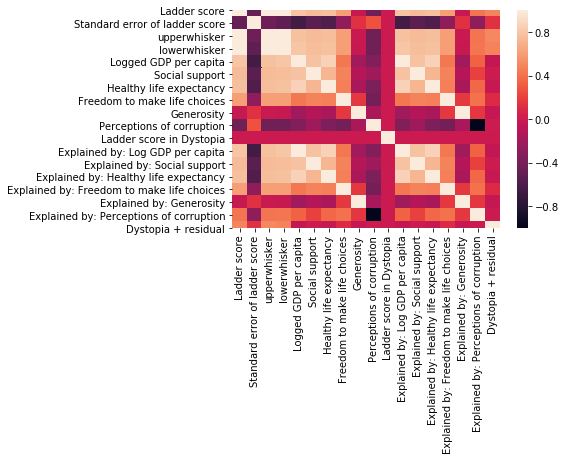

In [31]:
sns.heatmap(hapiness_df.corr());

Korelasi negatif itu diwarna hitam. <br>
Korelasi positif dihubungkan dengan yang warna putih. 

<h2>B. Multiple Regresi</h2>

Multiple Linear Regression merupakan generalisasi dari Simple Linear Regression yang memungkinkan untuk menggunakan beberapa explanatory variables. <br>

$$ 
Yhat = α + β_1 X_1 + β_2 X_2 + β_3 X_3 + β_n X_n
$$

<br>
Pada Simple Linear Regression kita hanya menggunakan satu 𝑃𝑟𝑒𝑑𝑖𝑐𝑡𝑜𝑟 𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒𝑠 untuk melakukan prediksi nilai. <br>
Sedangkan pada Multiple Linear Regression kita dapat menggunakan lebih dari satu 𝑃𝑟𝑒𝑑𝑖𝑐𝑡𝑜𝑟 𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒𝑠 untuk melakukan prediksi nilai.

In [32]:
Multi = hapiness_df[['Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices']]
model.fit(Multi, hapiness_df['Ladder score'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
model.intercept_
print(model.intercept_)

-3.1115663225633323


In [34]:
model.coef_
print(model.coef_)

[0.29181588 2.16586372 0.03307704 2.49816587]


<h2> Analisa dan Jelaskan Hasil Evaluasi multiple regression</h2>

In [35]:
print("Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices'")
print('-Multiple linear regression coef       :',model.coef_)
print('-Multiple linear regression intercept  :',model.intercept_)

Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices'
-Multiple linear regression coef       : [0.29181588 2.16586372 0.03307704 2.49816587]
-Multiple linear regression intercept  : -3.1115663225633323


<h2> Metric Evaluation </h2>
<h3>Mean Squared Error</h3>

In [36]:
mean_squared_error(y, y_vis)

0.4892977407350085

<h3>Mean Absolute Error</h3>

In [37]:
mean_absolute_error(y, y_vis)

0.5457107734555731

# 6. Lakukan pemodelan dengan regresi logistik dengan data yang sama dengan cara mentransformasikan variable dependent yang awalnya bernilai continue menjadi categorical (hint: Gunakan Binning Data in Pandas). Contoh: variable dependent harga mobil (bernilai continue) ditransformasikan menjadi harga model Mahal dan Murah (untuk 2 kelas), dan Mahal, Sedang, Murah (untuk 3 kelas). <br>

<h2>Regresi Logistik</h2>
<h3>Menggunakan Binning Data in Pandas</h3>

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [39]:
hapiness_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
Country name                                  149 non-null object
Regional indicator                            149 non-null object
Ladder score                                  149 non-null float64
Standard error of ladder score                149 non-null float64
upperwhisker                                  149 non-null float64
lowerwhisker                                  149 non-null float64
Logged GDP per capita                         149 non-null float64
Social support                                149 non-null float64
Healthy life expectancy                       149 non-null float64
Freedom to make life choices                  149 non-null float64
Generosity                                    149 non-null float64
Perceptions of corruption                     149 non-null float64
Ladder score in Dystopia                      149 non-null float64
Explained by: Log GDP per 

In [40]:
hapiness_df["Ladder score"].head()

0    7.842
1    7.620
2    7.571
3    7.554
4    7.464
Name: Ladder score, dtype: float64

In [41]:
hapiness_df["Ladder score"].replace(np.nan, -1, inplace=True)
hapiness_df["Ladder score"]=hapiness_df["Ladder score"].astype(int, copy=True)
hapiness_df["Ladder score"].replace(-1, np.nan, inplace=True)

In [42]:
bins = np.linspace(min(hapiness_df["Ladder score"]), max(hapiness_df["Ladder score"]), 4)
bins

array([2.        , 3.66666667, 5.33333333, 7.        ])

In [43]:
group_names = ['Kurang', 'Cukup', 'Baik']

In [44]:
hapiness_df['Ladder score-binned'] = pd.cut(hapiness_df['Ladder score'], bins, labels=group_names, include_lowest=True )
hapiness_df[['Ladder score','Ladder score-binned']].head(100)

,Ladder score,Ladder score-binned
0,7,Baik
1,7,Baik
2,7,Baik
3,7,Baik
4,7,Baik
...,...,...
95,5,Cukup
96,5,Cukup
97,5,Cukup
98,5,Cukup


In [45]:
hapiness_df["Ladder score-binned"].value_counts()

Cukup     85
Baik      52
Kurang    12
Name: Ladder score-binned, dtype: int64

Text(0.5, 1.0, 'Ladder score bins')

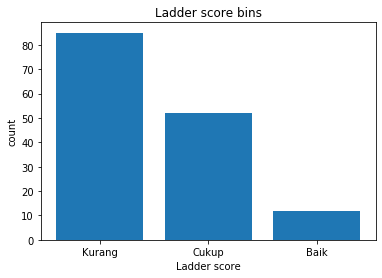

In [46]:
import matplotlib as plt
pyplot.bar(group_names, hapiness_df["Ladder score-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("Ladder score")
plt.pyplot.ylabel("count")
plt.pyplot.title("Ladder score bins")

# 7. Analisa dan jelaskan hasil evaluasi pemodelan regresi logistik

In [47]:
# Training dan Testing Dataset
x_train = np.array(hapiness_df['Social support']).reshape(-1, 1)
y_train = np.array(hapiness_df['Ladder score'])

x_test = np.array(hapiness_df['Social support']).reshape(-1, 1)
y_test = np.array(hapiness_df['Ladder score'])

In [48]:
logisticReg = LogisticRegression()
logisticReg.fit(x_train, y_train)

E:\ANACONDA\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\ANACONDA\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [49]:
y_pred=logisticReg.predict(x_test)

In [50]:
print(f"Koefisien          : {logisticReg.coef_}")
print(f"intercept          : {logisticReg.intercept_}")
print(f"score              : {logisticReg.score(x_test,y_test)}")

Koefisien          : [[-2.04178703]
 [-2.07574014]
 [-1.77809135]
 [-0.22608704]
 [ 0.83618373]
 [ 0.27770608]]
intercept          : [-2.18743791 -0.78806765  0.28382732 -0.51367341 -1.79844827 -2.14123607]
score              : 0.3221476510067114
